# Decision Tree

## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X)
print(y)

            Position  Level
0   Business Analyst      1
1  Junior Consultant      2
2  Senior Consultant      3
3            Manager      4
4    Country Manager      5
5     Region Manager      6
6            Partner      7
7     Senior Partner      8
8            C-level      9
9                CEO     10
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


## Encode categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

In [16]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20 stored elements and shape (10, 11)>
  Coords	Values
  (0, 0)	1.0
  (0, 10)	1.0
  (1, 4)	1.0
  (1, 10)	2.0
  (2, 8)	1.0
  (2, 10)	3.0
  (3, 5)	1.0
  (3, 10)	4.0
  (4, 3)	1.0
  (4, 10)	5.0
  (5, 7)	1.0
  (5, 10)	6.0
  (6, 6)	1.0
  (6, 10)	7.0
  (7, 9)	1.0
  (7, 10)	8.0
  (8, 1)	1.0
  (8, 10)	9.0
  (9, 2)	1.0
  (9, 10)	10.0


## Training the Decision Tree Regression model

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [17]:
print(regressor.predict(X))

[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


In [19]:
predict_data_transformed = ct.transform([['Manager',6.5]])

C:\Users\fesng\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [20]:
print(predict_data_transformed)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 11)>
  Coords	Values
  (0, 5)	1.0
  (0, 10)	6.5


In [21]:
regressor.predict(predict_data_transformed)

array([110000.])

In [ ]:
print(len(X))
print(len())

ValueError: x and y must be the same size

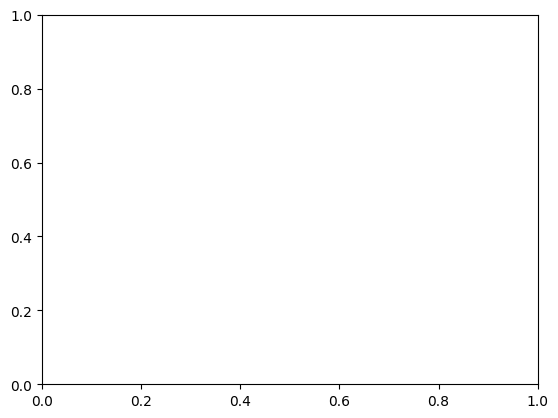

In [23]:
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.show()